# 급감속, 과속 지점 시각화
* 이미지 합성을 위함
* 급감속 및 과속이 이루어진 지점을 선형으로 표시
* Plotly Map에 배경이미지 합성

In [1]:
import datetime as dt
import os
import pandas as pd
import numpy as np

# Plotly : 인터랙티브 그래프를 그려주는 패키지
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as po

# 기준 : 68번 차량궤적

In [49]:
data_68 = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/4-2_68번차량궤적.csv'

In [50]:
df_68 = pd.read_csv(data_68)

In [51]:
fig = px.scatter(df_68, 
              x = 'Local X (m)', y = 'Local Y(m)',
              color = 'Frame ID',
              title = f'Sudden Dec : {dec[-10:-6]}',
              template = 'simple_white',
              width = 800,
              height = 800)
        
fig.update_xaxes(range = [0, 270])
fig.update_yaxes(range = [0, 270])

fig.update_layout({
    'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
    'paper_bgcolor' : 'rgba(0, 0, 0, 0)'},
    showlegend = False
)
        
#fig.update_traces(marker = dict(color = 'red', opacity = 0.5))
        
save_png_path = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/4-2_68번차량궤적.png'
        
fig.write_image(save_png_path)

# 과속

In [2]:
ovs_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/과속'

In [3]:
ovs_list = os.listdir(ovs_dir)
len(ovs_list)

2

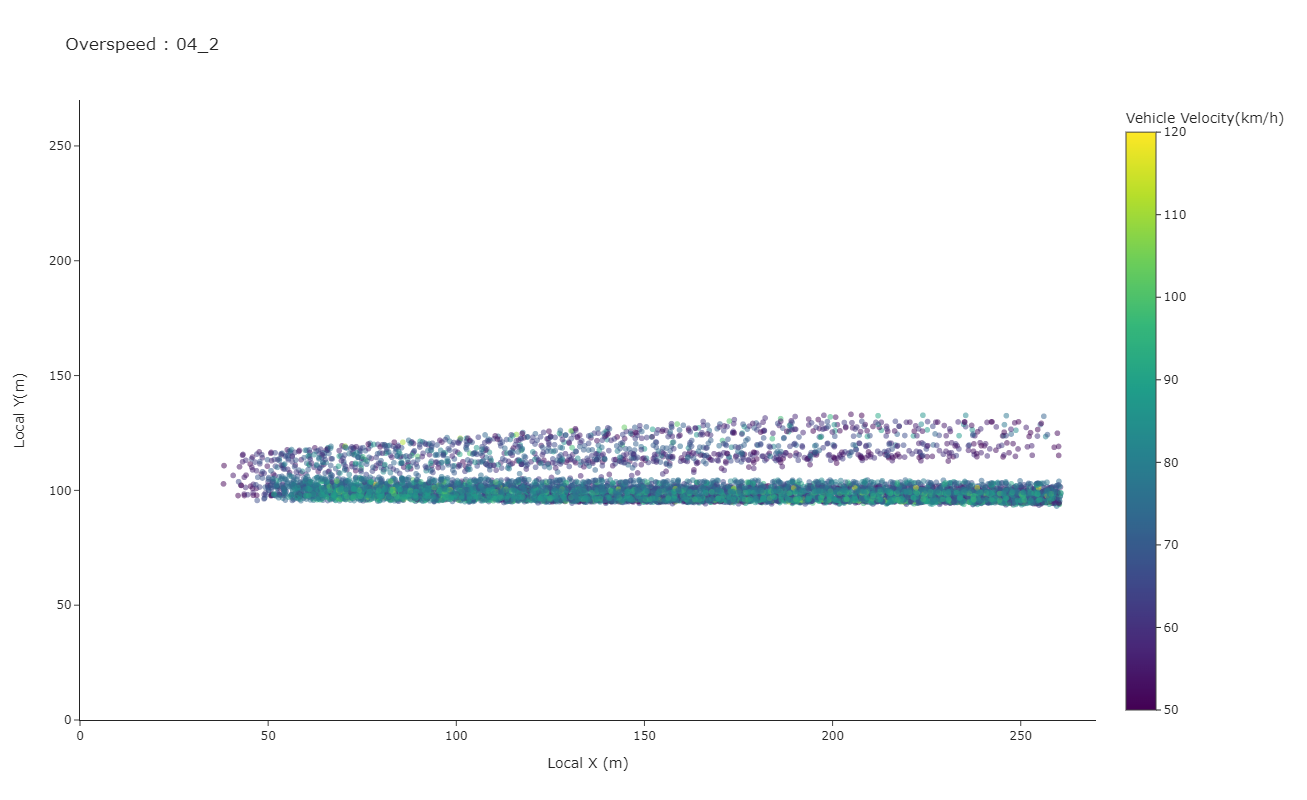

In [5]:
for ovs in ovs_list:
    # 각 파일 별로 점 그래프 그리기
    
    if ovs[-3:] == 'csv':
        ovs_path = os.path.join(ovs_dir, ovs)

        ovs_df = pd.read_csv(ovs_path)
        ovs_df = ovs_df[ovs_df['overspeed'] == 'Overspeed']
    
        fig = px.scatter(ovs_df, x = 'Local X (m)', y = 'Local Y(m)', 
                         color = 'Vehicle Velocity(km/h)',
                         opacity = 0.5,
                         title = f'Overspeed : {ovs[-10:-6]}',
                         template = 'simple_white',
                         width = 800,
                         height = 800,
                         range_color = [50, 120])
        
        fig.update_xaxes(range = [0, 270])
        fig.update_yaxes(range = [0, 270])
        
        fig.update_layout({
            'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
            'paper_bgcolor' : 'rgba(0, 0, 0, 0)'
        })
        
        #fig.update_traces(marker = dict(color = 'red', opacity = 0.5))
    
        save_html_name = f'{ovs[-10:-6]}.html'
        save_html_path = os.path.join(ovs_dir, save_html_name)
    
        po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
        save_png_name = f'{ovs[-10:-6]}.png'
        save_png_path = os.path.join(ovs_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
    else:
        pass
    
fig.show()

# 급감속

In [52]:
dec_dir = 'D:/OneDrive - 연세대학교 (Yonsei University)/Projects/Yonsei_TELab/003_도로상충_210517-/2차년도_2022/34_남양주TG_드론영상 현황 분석/ovs_dec_dataset/양양방향/급감속'

In [53]:
dec_list = os.listdir(dec_dir)
len(dec_list), dec_list[0]

(6, '04_1.html')

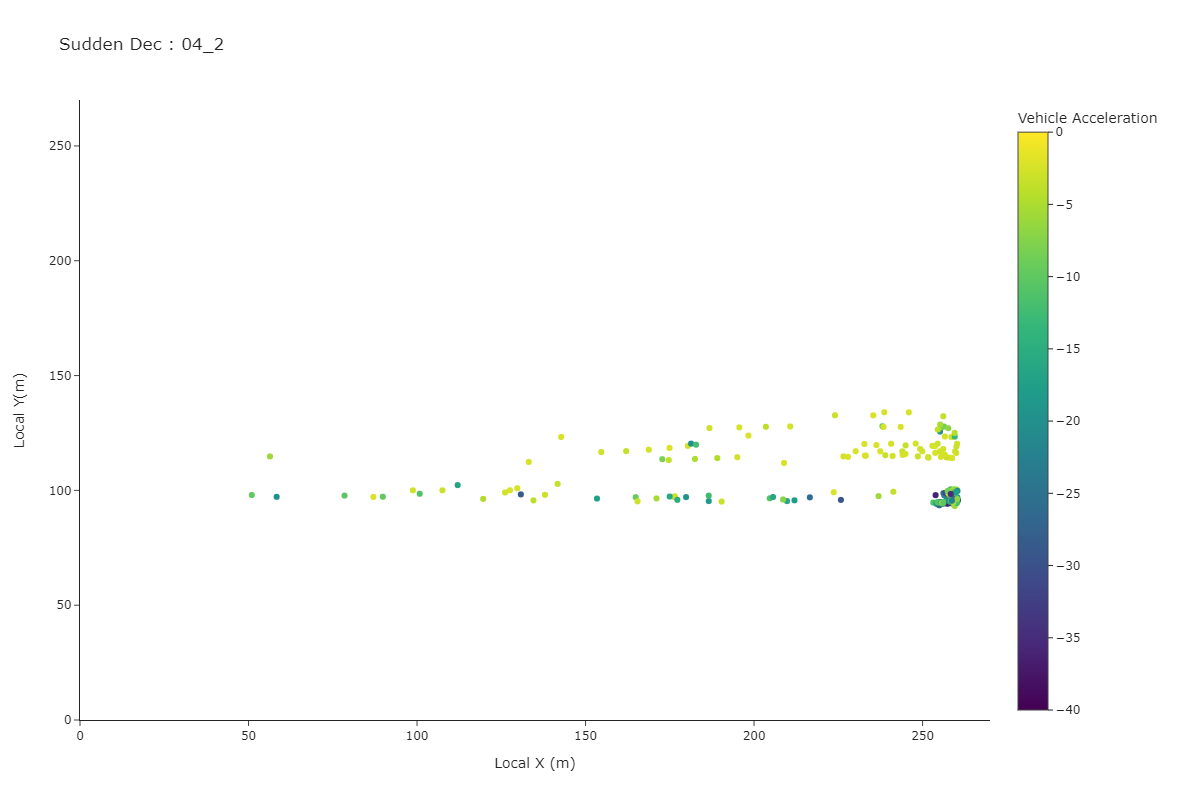

In [54]:
for dec in dec_list:
    # 각 파일 별로 점 그래프 그리기
    
    if dec[-3:] == 'csv':
        dec_path = os.path.join(dec_dir, dec)
        dec_df = pd.read_csv(dec_path)
    
        dec_df = dec_df[dec_df['sudden_dec'] == 'sudden_dec']
    
        fig = px.scatter(dec_df, x = 'Local X (m)', y = 'Local Y(m)', 
                         color = 'Vehicle Acceleration',
                         title = f'Sudden Dec : {dec[-10:-6]}',
                         template = 'simple_white',
                         width = 800,
                         height = 800,
                         range_color = [-40, 0])
        
        fig.update_xaxes(range = [0, 270])
        fig.update_yaxes(range = [0, 270])

        fig.update_layout({
            'plot_bgcolor' : 'rgba(0, 0, 0, 0)',
            'paper_bgcolor' : 'rgba(0, 0, 0, 0)'},
        )
        
        fig.update_layout(showlegend = False)
        
        #fig.update_traces(marker = dict(color = 'red', opacity = 0.5))
        
        save_html_name = f'{dec[-10:-6]}.html'
        save_html_path = os.path.join(dec_dir, save_html_name)
    
        po.write_html(fig, file = save_html_path) # html Plotly 파일 저장
        
        save_png_name = f'{dec[-10:-6]}.png'
        save_png_path = os.path.join(dec_dir, save_png_name)        
        
        fig.write_image(save_png_path)
    
    else:
        pass
    
fig.show()